## Programming exercises

### 1. Decision trees

#### Vertebrate data

In [2]:
# exercise 5.1.1

import numpy as np

# Names of data objects
dataobjectNames = [
    'Human',
    'Python',
    'Salmon',
    'Whale',
    'Frog',
    'Komodo dragon',
    'Bat',
    'Pigeon',
    'Cat',
    'Leopard shark',
    'Turtle',
    'Penguin',
    'Porcupine',
    'Eel',
    'Salamander',
    ]

# Attribute names
attributeNames = [
    'Body temperature',
    'Skin cover',
    'Gives birth',
    'Aquatic creature',
    'Aerial creature',
    'Has legs',
    'Hibernates'
    ]

# Attribute values
X = np.mat('''
    1 1 1 0 0 1 0;
    0 2 0 0 0 0 1;
    0 2 0 1 0 0 0;
    1 1 1 1 0 0 0;
    0 0 0 2 0 1 1;
    0 2 0 0 0 1 0;
    1 1 1 0 1 1 1;
    1 3 0 0 1 1 0;
    1 4 1 0 0 1 0;
    0 2 1 1 0 0 0;
    0 2 0 2 0 1 0;
    1 3 0 2 0 1 0;
    1 5 1 0 0 1 1;
    0 2 0 1 0 0 0;
    0 0 0 2 0 1 1 ''')

# Class indices
y = np.mat('3 4 2 3 0 4 3 1 3 2 4 1 3 2 0').T

# Class names
classNames = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']
    
# Number data objects, attributes, and classes
N, M = X.shape
C = len(classNames)



![](Pic.png)

In [3]:
import pandas as pd
df=pd.DataFrame(X).set_axis(attributeNames, axis=1, inplace=False)
df["y"]=y
df["Names"]=dataobjectNames
df=df.set_index("Names")
df

,Body temperature,Skin cover,Gives birth,Aquatic creature,Aerial creature,Has legs,Hibernates,y
Names,,,,,,,,
Human,1,1,1,0,0,1,0,3
Python,0,2,0,0,0,0,1,4
Salmon,0,2,0,1,0,0,0,2
Whale,1,1,1,1,0,0,0,3
Frog,0,0,0,2,0,1,1,0
Komodo dragon,0,2,0,0,0,1,0,4
Bat,1,1,1,0,1,1,1,3
Pigeon,1,3,0,0,1,1,0,1
Cat,1,4,1,0,0,1,0,3


In [8]:
## import dependencies
from sklearn import tree #For our Decision Tree
# ! pip install pydotplus
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

In [9]:
y=df["y"]
X=df.drop("y",axis=1)


# Fit regression tree classifier, Gini split criterion, no pruning
dtc = tree.DecisionTreeClassifier(criterion='gini')
dtc = dtc.fit(X,y)

In [10]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(dtc, None))

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.5\ngini = 0.773\nsamples = 15\nvalue = [2, 2, 3, 5, 3]"] ;
1 [label="X[1] <= 1.0\ngini = 0.656\nsamples = 8\nvalue = [2, 0, 3, 0, 3]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[3] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 3, 0, 3]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]"] ;
3 -> 4 ;
5 [label="X[3] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 1]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]"] ;
5 -> 7 ;
8 [label="X[2] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 0, 5, 0]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0]"] ;
8 -> 10 ;

In [11]:
#Create Dot Data
out = tree.export_graphviz(dtc, out_file="tree_gini.gvz", feature_names=attributeNames, 
                                class_names=classNames, rounded=True, filled=True) 
#Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

The generated file (here: `tree_gini.gvz`) can be visualized externally with i.e. Graphviz editor or
dot command-line tool. Open gvetit.exe externally ... then open the saved `.gvz` file

In [12]:
# Fit regression tree classifier, deviance (entropy) split criterion, no pruning
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(X,y)

# Export tree graph for visualization purposes:
# (note: you can use i.e. Graphviz application to visualize the file)
out = tree.export_graphviz(dtc, out_file='tree_deviance.gvz', feature_names=attributeNames,
                          class_names=classNames, rounded=True, filled=True)

Show that a dragon, which is cold-blooded, has scales, gives birth, is semi aquatic, is an aerial creature, has legs, and hibernates, will be classiffied as a reptile.

In [13]:
# Define a new data object (a dragon) with the attributes given in the text
x = np.array([0, 2, 1, 2, 1, 1, 1])
new_x=x.reshape(1,-1)


In [14]:
# Evaluate the classification tree for the new data object
x_class = dtc.predict(new_x)[0]

# Print results
print ('\nNew object attributes:')
print (dict(zip(attributeNames,x)))
print ('\nClassification result:')
print (classNames[x_class])


New object attributes:
{'Body temperature': 0, 'Skin cover': 2, 'Gives birth': 1, 'Aquatic creature': 2, 'Aerial creature': 1, 'Has legs': 1, 'Hibernates': 1}

Classification result:
Reptile


#### Wine data

The script removes outliers from the data set. Outliers are defined as data objects where Volatile acidity > 20 g/dm3, Density > 10 g/cm3, or Alcohol > 200%.
The script also removes attribute 12, Quality score, from the data set, in order to use only the quantitative measurements for the prediction.

In [15]:
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('wine.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]
#attributeNames = [name[0] for name in mat_data['attributeNames'][0]
#classNames = [name[0][0] for name in mat_data['classNames'][0]]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20).A.ravel() | (X[:,7]>10).A.ravel() | (X[:,10]>200).A.ravel()
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask,:]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape


In [16]:
df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
X=df.drop("y",axis=1)
y=df.y
X.shape

(6304, 11)

In [18]:
# Fit regression tree classifier, Gini split criterion, pruning enabled
dtc_100 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=100)
dtc_100 = dtc.fit(X,y)

# Export tree graph for visualization purposes:
# (note: you can use i.e. Graphviz application to visualize the file)
out_100 = tree.export_graphviz(dtc_100, out_file='tree_gini_Wine_data.png', feature_names=attributeNames)

In [19]:
# Define a new data object (new type of wine) with the attributes given in the text
x=np.array([6.9,1.09,0.06,2.1,0.0061,12,31,0.99,3.5,0.44,12])
x_new=x.reshape(1,-1)
x_class=dtc_100.predict(x_new)[0]

# Print results
print ('\nNew object attributes:')
print (dict(zip(attributeNames,x)))
print ('\nClassification result:')
print (classNames[x_class])



New object attributes:
{'Fixed acidity': 6.9, 'Volatile acidity': 1.09, 'Citric acid': 0.06, 'Residual sugar': 2.1, 'Chlorides': 0.0061, 'Free sulfur dioxide': 12.0, 'Total sulfur dioxide': 31.0, 'Density': 0.99, 'pH': 3.5, 'Sulphates': 0.44, 'Alcohol': 12.0}

Classification result:
White


### 2. Linear and logistic regression

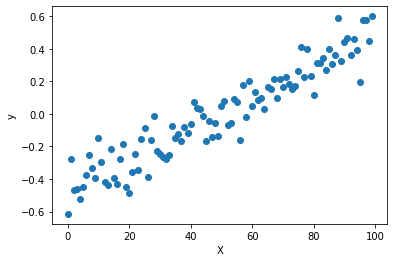

In [21]:
import matplotlib.pyplot as plt
# Number of data objects
N = 100

# Attribute values
X = np.mat(range(N)).T

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.mat(eps_std*np.random.randn(N) + eps_mean).T

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1*X + eps

# Make a scatter plot
plt.figure()
plt.plot(X.A,y.A,'o')
plt.xlabel('X'); plt.ylabel('y')

plt.show()

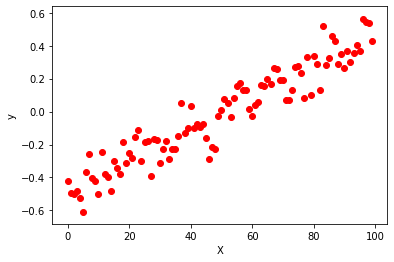

In [22]:
N=100
X=np.arange(N)
ebs=np.random.normal(0,.1,N)
# Model parameters
w0 = -0.5
w1 = 0.01
y = w0 + w1*X + ebs
plt.scatter(X,y,c="r")
plt.xlabel('X'); plt.ylabel('y');

In [23]:
import sklearn.linear_model as lm
# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X.reshape(-1, 1),y)

y_true=y-ebs
y_est = model.predict(X.reshape(-1, 1))
# Or equivalently:
#y_est = model.intercept_ + X * model.coef_


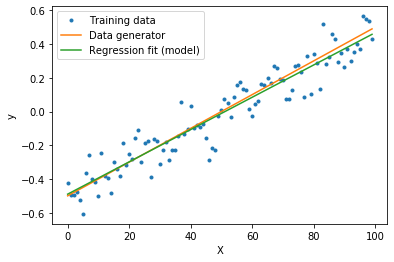

In [24]:
# Plot original data and the model output

plt.plot(X,y,'.')
plt.plot(X,y_true,'-')
plt.plot(X,y_est,'-')
plt.xlabel('X'); plt.ylabel('y')
plt.legend(['Training data', 'Data generator', 'Regression fit (model)'])

plt.show()

(5, 50)


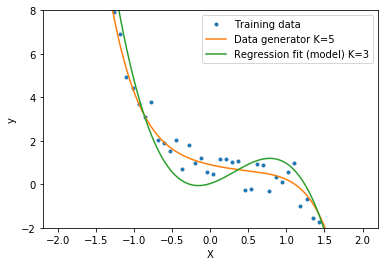

In [186]:
# Parameters
Kd = 5  # no of terms for data generator
Km = 3  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe =  np.linspace(-2,2,1000) # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5          # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2,2,N)
Xd = [np.power(X, n) for n in range(1,Kd+1)]
eps = np.random.normal(eps_mean,eps_std,N)
w = [-np.power(-.9,n) for n in range(1,Kd+2)]
#y=w[0]+w[1:]*Xd+eps
print(np.array(Xd).shape)

# Generate dataset (with noise)
y=w[0]+np.dot(np.array(w[1:]).reshape(1,-1),np.array(Xd))+eps


# True data generator (assuming no noise)
Xde=[np.power(Xe, n) for n in range(1,Kd+1)]
y_true = w[0]+np.dot(np.array(w[1:]).reshape(1,-1),np.array(Xde))

# Fit ordinary least squares regression model
Xm = [np.power(X, n) for n in range(1,Km+1)]
np.array(Xm)

# Fit ordinary least squares regression model
Xm = [np.power(X,n) for n in range(1,Km+1)]
model = lm.LinearRegression()
model = model.fit(np.mat(Xm).T,y.T)

# Predict values
Xme = [np.power(Xe,n) for n in range(1,Km+1)]
y_est = model.predict(np.mat(Xme).T)

# Plot original data and the model output
f = plt.figure()
plt.plot(X,y.flatten(),'.')
plt.plot(Xe,y_true.flatten(),'-')
plt.plot(Xe,y_est.flatten(),'-')
plt.xlabel('X'); plt.ylabel('y'); plt.ylim(-2,8)
plt.legend(['Training data', 'Data generator K={0}'.format(Kd), 'Regression fit (model) K={0}'.format(Km)])

plt.show()